In [2]:
import pandas as pd
import numpy as np

In [3]:
data_sample = pd.read_csv('h1b_kaggle.csv')

In [4]:
data_sample.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
len(data_sample)

3002458

Changing 'SOC_NAME' to upper case to be able to group them effectively

In [6]:
data_sample['SOC_NAME'] = data_sample['SOC_NAME'].apply(lambda v : str(v).upper())

## Descriptive Statistics

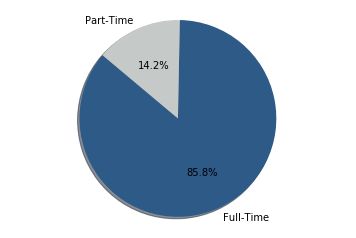

In [9]:
import matplotlib.pyplot as plt
 
labels = 'Full-Time', 'Part-Time'
ft = len(data_sample[data_sample['FULL_TIME_POSITION'] == 'Y'])/len(data_sample)*100
pt = 100- len(data_sample[data_sample['FULL_TIME_POSITION'] == 'Y'])/len(data_sample)*100
sizes = [ft,pt]
colors = ['#2e5a88', '#c5c9c7']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [8]:
data_sample.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


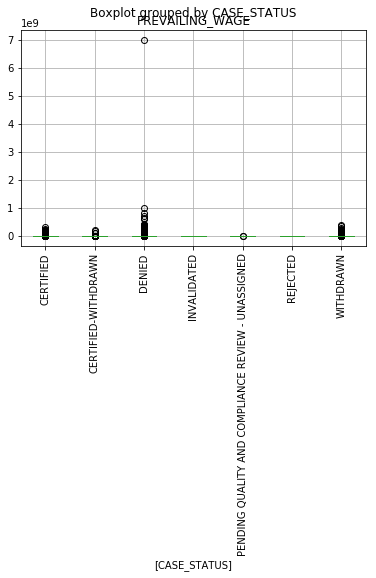

In [10]:
data_sample[['CASE_STATUS', 'PREVAILING_WAGE']].boxplot(by = 'CASE_STATUS', rot=90)

As we can see the data has some outliers

In [13]:
print("{}:{}".format("Over 1 M ", len(data_sample[(data_sample['PREVAILING_WAGE'] > 1000000)])))
print("{}:{}".format("Over 500 k ", len(data_sample[(data_sample['PREVAILING_WAGE'] > 500000)])))
print("{}:{}".format("Over 300 k ", len(data_sample[(data_sample['PREVAILING_WAGE'] > 300000)])))
print("{}:{}".format("Over 250 k ", len(data_sample[(data_sample['PREVAILING_WAGE'] > 250000)])))

Over 1 M :2018
Over 500 k :2461
Over 300 k :2876
Over 250 k :3407


In [19]:
data_sample[(data_sample['PREVAILING_WAGE'] > 300000)].groupby(by = 'CASE_STATUS').count()

,Unnamed: 0,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
CASE_STATUS,,,,,,,,,,
CERTIFIED,301,301,301,301,301,301,301,301,258,258
CERTIFIED-WITHDRAWN,29,29,29,29,29,29,29,29,22,22
DENIED,2311,2311,2311,2311,2311,2311,2311,2311,2161,2161
WITHDRAWN,235,235,235,235,235,235,235,235,227,227


Outliers are mainly from denied applications

In [16]:
indexes_ = list(data_sample[data_sample['CASE_STATUS'] == 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'].index)
data_sample.iloc[indexes_,:2] = 'PENDING'

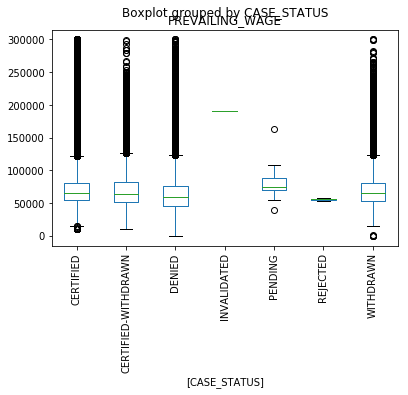

In [17]:
data2 = data_sample[(data_sample['PREVAILING_WAGE'] > 300000 ) == False]
data2[['CASE_STATUS', 'PREVAILING_WAGE']].boxplot(by = 'CASE_STATUS', rot=90, grid = False)

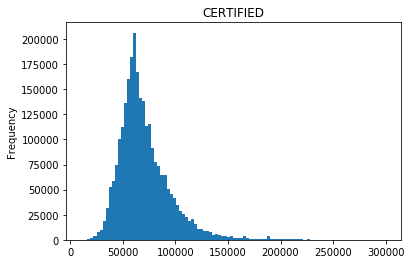

In [27]:
datahist = data2[data2['CASE_STATUS'] == 'CERTIFIED']
datahist['PREVAILING_WAGE'].plot.hist(bins = 100, title = 'CERTIFIED')

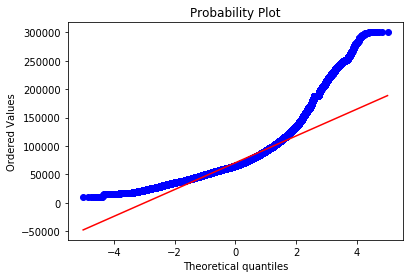

In [22]:
import numpy as np 
import pylab 
import scipy.stats as stats
  
stats.probplot(datahist['PREVAILING_WAGE'], plot=pylab)
pylab.show()

Cluttered towards the 50th percentile, then they increase exponentially and then it remains at certain level.

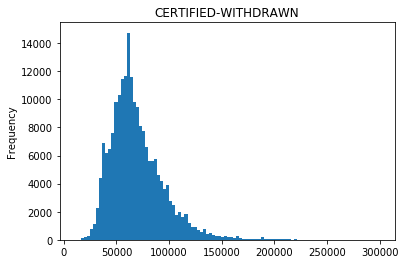

In [26]:
datahist = data2[data2['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN']
datahist['PREVAILING_WAGE'].plot.hist(bins = 100, title = 'CERTIFIED-WITHDRAWN')

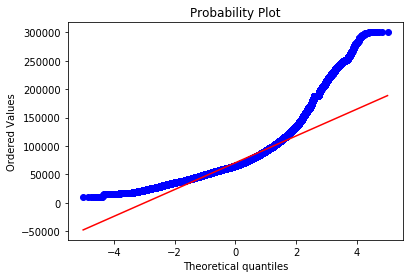

In [28]:
stats.probplot(datahist['PREVAILING_WAGE'], plot=pylab)
pylab.show()

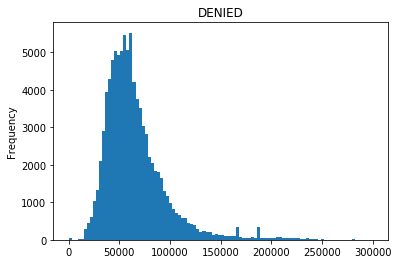

In [29]:
datahist = data2[data2['CASE_STATUS'] == 'DENIED']
datahist['PREVAILING_WAGE'].plot.hist(bins = 100, title = 'DENIED')

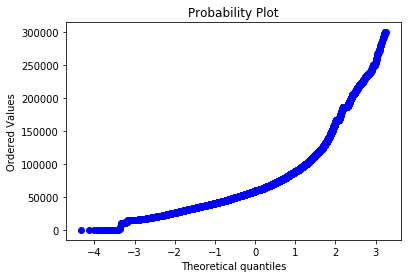

In [30]:
stats.probplot(datahist['PREVAILING_WAGE'], fit=True, plot=pylab)
pylab.show()

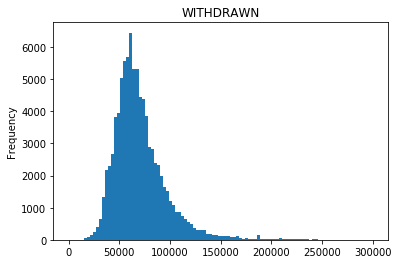

In [31]:
datahist = data2[data2['CASE_STATUS'] == 'WITHDRAWN']
datahist['PREVAILING_WAGE'].plot.hist(bins = 100, title = 'WITHDRAWN')

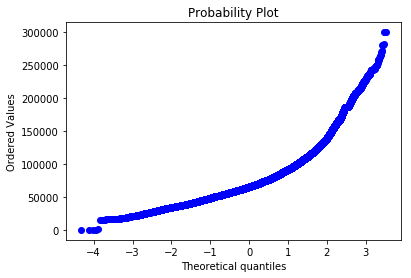

In [32]:
stats.probplot(datahist['PREVAILING_WAGE'], fit=True, plot=pylab)
pylab.show()

In [33]:
data_sample.groupby(by = 'CASE_STATUS').describe()

PREVAILING_WAGE                                        \
                              count          mean           std       min   
CASE_STATUS                                                                 
CERTIFIED                 2615623.0  7.255421e+04  5.449435e+05   10504.0   
CERTIFIED-WITHDRAWN        202659.0  7.254357e+04  7.039623e+05   10504.0   
DENIED                      94293.0  2.245191e+06  2.912081e+07       0.0   
INVALIDATED                     1.0  1.901950e+05           NaN  190195.0   
PENDING                        15.0  8.211607e+04  2.836286e+04   40000.0   
REJECTED                        2.0  5.556700e+04  3.279561e+03   53248.0   
WITHDRAWN                   89780.0  2.802483e+05  5.455038e+06       0.0   

                                                                      YEAR  \
                          25%       50%       75%           max      count   
CASE_STATUS                                                                  
CERTIFIED             54766.0   65125.0   81432.0  3.060491e+08  2615623.0   
CERTIFIED-WITHDRAWN   52354.0   64085.0   82243.0  2.129878e+08   202659.0   
DENIED                45968.0   59779.0   78603.0  6.997607e+09    94346.0   
INVALIDATED          190195.0  190195.0  190195.0  1.901950e+05        1.0   
PENDING               70517.0   75171.0   88722.5  1.628430e+05       15.0   
REJECTED              54407.5   55567.0   56726.5  5.788600e+04        2.0   
WITHDRAWN             53747.0   65416.0   81598.8  4.066379e+08    89799.0   

                                     ...            lat                   lon  \
                            mean     ...            75%        max      count   
CASE_STATUS                          ...                                        
CERTIFIED            2013.875546     ...      40.905099  64.837778  2527213.0   
CERTIFIED-WITHDRAWN  2014.013811     ...      40.825763  64.837778   196887.0   
DENIED               2012.808270     ...      40.728158  64.837778    85685.0   
INVALIDATED          2014.000000     ...      37.338208  37.338208        1.0   
PENDING              2013.000000     ...      40.615750  42.305650       15.0   
REJECTED             2014.000000     ...      41.577211  41.577211        1.0   
WITHDRAWN            2013.998664     ...      40.817118  64.837778    85401.0   

                                                                    \
                           mean        std         min         25%   
CASE_STATUS                                                          
CERTIFIED            -92.073891  19.397653 -157.858333 -111.891047   
CERTIFIED-WITHDRAWN  -93.538920  19.226276 -157.858333 -117.161084   
DENIED               -90.514795  26.281546 -157.858333 -111.891047   
INVALIDATED         -121.886329        NaN -121.886329 -121.886329   
PENDING              -84.677593  18.362024 -121.899574  -82.632982   
REJECTED             -93.711332        NaN  -93.711332  -93.711332   
WITHDRAWN            -92.313575  20.265047 -157.858333 -112.074037   

                                                         
                            50%         75%         max  
CASE_STATUS                                              
CERTIFIED            -86.158068  -75.490183  145.729789  
CERTIFIED-WITHDRAWN  -87.840619  -76.612189  145.729789  
DENIED               -84.387982  -74.845997  145.729789  
INVALIDATED         -121.886329 -121.886329 -121.886329  
PENDING              -74.546544  -74.217506  -71.524509  
REJECTED             -93.711332  -93.711332  -93.711332  
WITHDRAWN            -87.064170  -75.524368  145.729789  

[7 rows x 32 columns]

In [34]:
data_sample.groupby(by = ['YEAR', 'CASE_STATUS']).describe()

PREVAILING_WAGE                              \
                                     count          mean           std   
YEAR   CASE_STATUS                                                       
2011.0 CERTIFIED                  307936.0  7.545276e+04  1.194241e+06   
       CERTIFIED-WITHDRAWN         11596.0  9.973618e+04  2.568269e+06   
       DENIED                      29125.0  1.405632e+06  1.497661e+07   
       WITHDRAWN                   10097.0  4.318060e+05  7.702734e+06   
2012.0 CERTIFIED                  352668.0  7.084256e+04  6.842306e+05   
       CERTIFIED-WITHDRAWN         31118.0  6.614405e+04  5.009515e+04   
       DENIED                      21074.0  2.141362e+06  1.715566e+07   
       WITHDRAWN                   10721.0  2.486356e+05  4.908634e+06   
2013.0 CERTIFIED                  382951.0  7.171203e+04  5.241410e+05   
       CERTIFIED-WITHDRAWN         35432.0  7.424146e+04  8.191671e+05   
       DENIED                      12120.0  4.388700e+06  6.796768e+07   
       PENDING                        15.0  8.211607e+04  2.836286e+04   
       WITHDRAWN                   11585.0  3.603762e+05  6.723850e+06   
2014.0 CERTIFIED                  455144.0  7.057357e+04  2.498929e+04   
       CERTIFIED-WITHDRAWN         36350.0  6.980802e+04  2.587274e+04   
       DENIED                      11884.0  4.360434e+06  2.596954e+07   
       INVALIDATED                     1.0  1.901950e+05           NaN   
       REJECTED                        2.0  5.556700e+04  3.279561e+03   
       WITHDRAWN                   16033.0  4.999264e+05  7.347762e+06   
2015.0 CERTIFIED                  547278.0  7.251240e+04  3.263236e+05   
       CERTIFIED-WITHDRAWN         41071.0  7.120576e+04  2.591555e+04   
       DENIED                      10916.0  1.025006e+06  1.238765e+07   
       WITHDRAWN                   19454.0  1.703613e+05  3.825587e+06   
2016.0 CERTIFIED                  569646.0  7.423585e+04  1.234441e+05   
       CERTIFIED-WITHDRAWN         47092.0  7.207721e+04  2.660882e+04   
       DENIED                       9174.0  1.029030e+06  1.232553e+07   
       WITHDRAWN                   21890.0  1.201754e+05  2.514722e+06   

                                                                      \
                                 min        25%       50%        75%   
YEAR   CASE_STATUS                                                     
2011.0 CERTIFIED             15070.0   50440.00   61318.0   77548.00   
       CERTIFIED-WITHDRAWN   15100.8   50315.00   60850.4   77864.50   
       DENIED                    0.0   43410.00   55619.0   72696.00   
       WITHDRAWN                 0.0   49941.00   61360.0   78624.00   
2012.0 CERTIFIED             10504.0   51979.00   62566.0   78520.00   
       CERTIFIED-WITHDRAWN   14851.2   49358.00   61506.0   78042.00   
       DENIED                    0.0   44616.00   58053.0   76285.50   
       WITHDRAWN              2012.0   51334.00   62438.0   78083.00   
2013.0 CERTIFIED             15080.0   53914.00   64043.0   80496.00   
       CERTIFIED-WITHDRAWN   10504.0   50939.00   63398.0   81494.00   
       DENIED                 7799.0   48339.00   61942.0   81871.75   
       PENDING               40000.0   70517.00   75171.0   88722.50   
       WITHDRAWN             15226.0   52416.00   64043.0   80766.00   
2014.0 CERTIFIED             14580.8   55245.00   65000.0   80891.00   
       CERTIFIED-WITHDRAWN   16432.0   52686.00   64126.0   82930.00   
       DENIED                    0.0   49124.70   63107.0   84032.00   
       INVALIDATED          190195.0  190195.00  190195.0  190195.00   
       REJECTED              53248.0   54407.50   55567.0   56726.50   
       WITHDRAWN             16910.4   53664.00   65790.0   83595.20   
2015.0 CERTIFIED             12584.0   56202.00   66394.0   81869.00   
       CERTIFIED-WITHDRAWN   16610.0   54202.00   65936.0   84282.00   
       DENIED                    0.0   49019.20   63492.0   82487.50   
      

### TABLEAU Plot

<img src="Distribution.png">

## DESCRIPTIONS BY CAREER

In [151]:
#set(data_sample['SOC_NAME'].sort_values())

There was a mis spelling in some of 'SOC_NAME' rows

In [61]:
data_sample.iloc[data_sample[data_sample['SOC_NAME'] == 'COMPUTER OCCUPATIONS, ALL OTHER*'].index, 3] = 'COMPUTER OCCUPATIONS, ALL OTHER'
data_sample.iloc[data_sample[(data_sample['SOC_NAME'].str.contains('.*COMPUTER SYSTEMS ANALY', na = False))].index,3] = 'COMPUTER SYSTEMS ANALYSTS'

In [62]:
len(set(data_sample['SOC_NAME']))

1585

In [63]:
len(set(data_sample['JOB_TITLE']))

287550

In [64]:
grps = data_sample.groupby(by = 'SOC_NAME')
jobs_desc = grps.describe()
jobs_desc = jobs_desc['PREVAILING_WAGE']
jobs_desc = jobs_desc.sort_values(by=['count'], ascending=False)
jobs_desc.head(20)

,count,mean,std,min,25%,50%,75%,max
SOC_NAME,,,,,,,,
COMPUTER SYSTEMS ANALYSTS,506515.0,131086.530705,2.987534e+06,0.00,58677.0,64043.0,76211.00,6.169317e+08
"SOFTWARE DEVELOPERS, APPLICATIONS",414710.0,151335.107554,3.457995e+06,31.69,66664.0,78811.2,94182.00,7.099999e+08
COMPUTER PROGRAMMERS,398542.0,134590.255069,3.349164e+06,0.00,52458.0,58510.0,67330.00,1.007814e+09
"COMPUTER OCCUPATIONS, ALL OTHER",204121.0,98469.391242,1.991451e+06,15080.00,57408.0,65125.0,77210.00,1.896690e+08
"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",83856.0,143590.257304,3.182416e+06,23858.00,75064.5,88275.2,104040.50,3.067418e+08
MANAGEMENT ANALYSTS,66872.0,148524.524681,3.196351e+06,15080.00,55723.0,64106.0,82638.00,2.369578e+08
FINANCIAL ANALYSTS,53538.0,153111.660529,3.406154e+06,0.00,58801.6,67204.8,90800.00,2.962710e+08
ACCOUNTANTS AND AUDITORS,52822.0,124475.061682,2.750806e+06,0.00,46592.0,53518.0,61880.00,1.856026e+08
MECHANICAL ENGINEERS,44236.0,129163.979527,2.716203e+06,0.00,59488.0,66726.0,78665.60,1.496498e+08


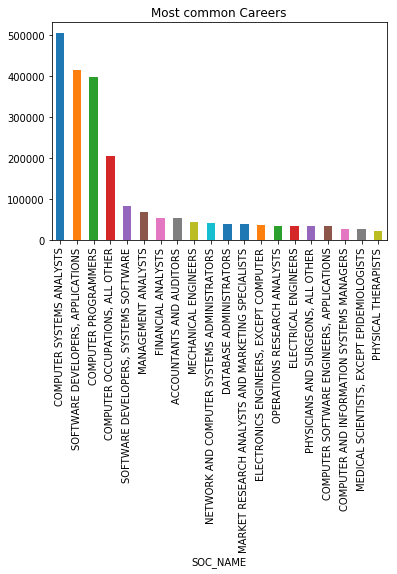

In [65]:
import matplotlib.pyplot as plt
plt.figure();
jobs_desc[0:20]['count'].plot.bar(title = 'Most common Careers')

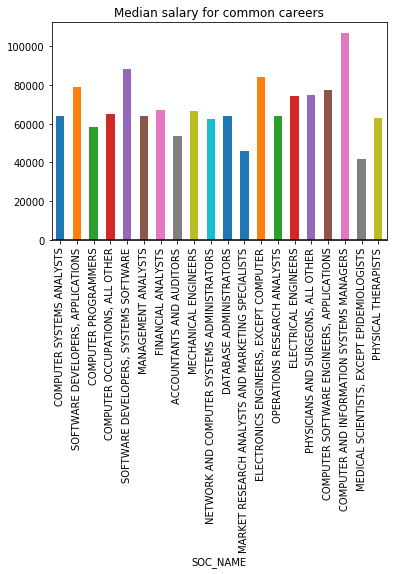

In [66]:
plt.figure();
jobs_desc[0:20]['50%'].plot.bar(title = 'Median salary for common careers'); plt.axhline(0, color='k')

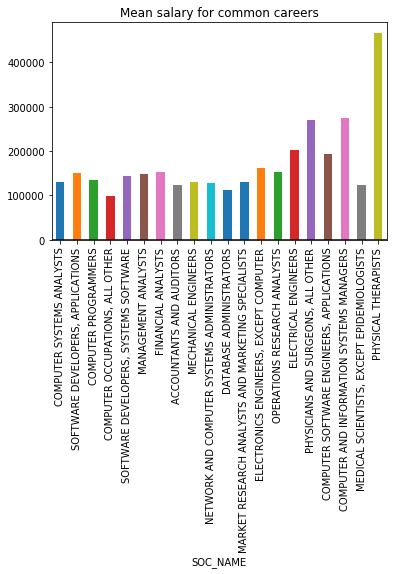

In [68]:
plt.figure();
jobs_desc[0:20]['mean'].plot.bar(title = 'Mean salary for common careers'); plt.axhline(0, color='k')

The differences in mean and median are bigger for outliers

Spliting Accepted and Refused

In [69]:
data_sample_approved = data_sample[(data_sample['CASE_STATUS'].str.contains('CERTIFIED')) | (data_sample['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN'))]
data_sample_refused = data_sample[(data_sample['CASE_STATUS'].str.contains('CERTIFIED') == False) & (data_sample['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN') == False)]

In [70]:
set(data_sample_approved['CASE_STATUS'])

{'CERTIFIED', 'CERTIFIED-WITHDRAWN'}

### Applications and Salaries over time

In [71]:
grps = data_sample.groupby(by = 'YEAR')
wages_time = grps['PREVAILING_WAGE'].describe()
wages_time

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2011.0,358754.0,194256.093500,4.631315e+06,0.0,50128.0,60882.0,77272.0,1.007814e+09
2012.0,415581.0,180072.839671,4.018625e+06,0.0,51626.0,62462.0,78374.4,3.783437e+08
2013.0,442103.0,197827.097951,1.134051e+07,7799.0,53747.0,63898.0,80704.0,6.997607e+09
2014.0,519414.0,181923.634331,4.184556e+06,0.0,54829.0,64917.0,81200.0,8.201323e+08
2015.0,618719.0,92307.028050,1.810364e+06,0.0,55890.0,66394.0,81890.0,3.067418e+08
2016.0,647802.0,89152.817524,1.546315e+06,0.0,57325.0,68245.0,85176.0,3.291392e+08


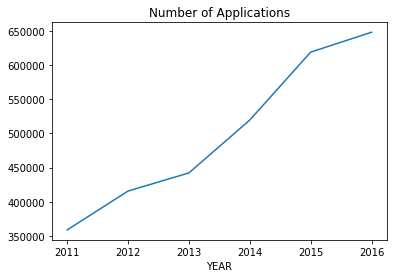

In [73]:
plt.figure();
wages_time['count'].plot.line(title = 'Number of Applications')

Growth Rates of Number of Aplications:

In [74]:
[(wages_time['count'].iloc[i+1] - wages_time['count'].iloc[i])*100/wages_time['count'].iloc[i] for i in range(0,5)]

[15.840102131265436,
 6.381908701312139,
 17.487101422066804,
 19.118660644495527,
 4.7005183289991095]

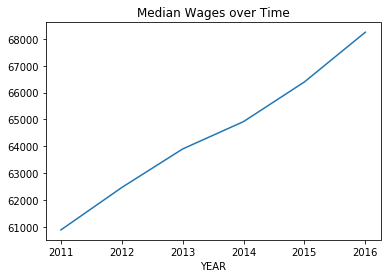

In [77]:
plt.figure();
wages_time['50%'].plot.line(title = 'Median Wages over Time')

Growth Rate of Median Wages

In [78]:
[(wages_time['50%'].iloc[i+1] - wages_time['50%'].iloc[i])*100/wages_time['50%'].iloc[i] for i in range(0,5)]

[2.5951841266712656,
 2.298997790656719,
 1.5947290995023318,
 2.2752129642466534,
 2.7879025213121666]

### Acceptance Rates

This makes a DataFrame with the acceptance rates of the top 25 (most common) careers

In [80]:
grps = data_sample_approved.groupby(by = 'SOC_NAME')
jobs_desc = grps.describe()
jobs_desc = jobs_desc['PREVAILING_WAGE']
jobs_desc = jobs_desc.sort_values(by=['count'], ascending=False)
jobs_accepted = jobs_desc['count']

In [81]:
grps = data_sample_refused.groupby(by = 'SOC_NAME')
jobs_desc = grps.describe()
jobs_desc = jobs_desc['PREVAILING_WAGE']
jobs_desc = jobs_desc.sort_values(by=['count'], ascending=False)
jobs_refused = jobs_desc['count']

In [84]:
total = pd.concat([jobs_accepted, jobs_refused], axis=1, join='inner')
total.columns = ['accepted', 'rejected']
total = total[1:25]

In [85]:
total['sum'] = total['accepted'] + total['rejected']
total['acc_rate'] = total['accepted'] / total['sum']
total.sort_values(by = 'acc_rate', ascending = False)

,accepted,rejected,sum,acc_rate
SOC_NAME,,,,
COMPUTER SYSTEMS ANALYST,17302.0,124.0,17426.0,0.992884
"COMPUTER OCCUPATIONS, ALL OTHER",196882.0,7239.0,204121.0,0.964536
"SOFTWARE DEVELOPERS, APPLICATIONS",395718.0,18992.0,414710.0,0.954204
COMPUTER PROGRAMMERS,380270.0,18272.0,398542.0,0.954153
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,38201.0,1884.0,40085.0,0.953000
DATABASE ADMINISTRATORS,37051.0,1931.0,38982.0,0.950464
OPERATIONS RESEARCH ANALYSTS,32494.0,1766.0,34260.0,0.948453
BIOCHEMISTS AND BIOPHYSICISTS,20138.0,1106.0,21244.0,0.947938
"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",79411.0,4445.0,83856.0,0.946992


#### Doing the same for employers

In [86]:
grps = data_sample_refused.groupby(by = 'EMPLOYER_NAME')
jobs_desc_employer_refused = grps.describe()
jobs_desc_employer_refused = jobs_desc_employer_refused['PREVAILING_WAGE']
jobs_desc_employer_refused = jobs_desc_employer_refused.sort_values(by=['count'], ascending=False)
jobs_employer_refused_count = jobs_desc_employer_refused['count']

In [150]:
grps = data_sample_approved.groupby(by = 'EMPLOYER_NAME')
jobs_desc_employer_approved = grps.describe()
jobs_desc_employer_approved = jobs_desc_employer_approved['PREVAILING_WAGE']
jobs_desc_employer_approved = jobs_desc_employer_approved.sort_values(by=['count'], ascending=False)
jobs_employer_approved_count = jobs_desc_employer_approved['count']

In [ ]:
total_employer = pd.concat([jobs_employer_approved_count, jobs_employer_refused_count], axis=1, join='inner')
total_employer.columns = ['accepted', 'rejected']
total_employer = total_employer[1:25]

In [ ]:
total_employer['sum'] = total_employer['accepted'] + total_employer['rejected']
total_employer['acc_rate'] = total_employer['accepted'] / total_employer['sum']
total_employer.sort_values(by = 'acc_rate', ascending = False)

### Taking the top ten Employers (Based on Acceptance Rate) and Zooming into features

In [96]:
data_top_Employers_accp_rate = data_sample[(data_sample['EMPLOYER_NAME'].str.contains('ACCENTURE', na = False) | data_sample['EMPLOYER_NAME'].str.contains('TECH MAHINDRA', na = False)
| data_sample['EMPLOYER_NAME'].str.contains('TATA CONSULTANCY SERVICES LIMITED', na = False) | data_sample['EMPLOYER_NAME'].str.contains('HCL AMERICA', na = False)
| data_sample['EMPLOYER_NAME'].str.contains('DELOITTE CONSULTING LLPC', na = False))]

In [95]:
set(data_top_Employers_accp_rate['EMPLOYER_NAME'])

{'ACCENTURE GLOBAL INC',
 'ACCENTURE LLP',
 'ACCENTURE TECHNOLOGY SOLUTIONS',
 'ACCENTURE, LLP',
 'HCL AMERICA, INC',
 'HCL AMERICA, INC.',
 'TATA CONSULTANCY SERVICES LIMITED',
 'TECH MAHINDRA',
 'TECH MAHINDRA ( AMERICAS), INC',
 'TECH MAHINDRA (AMERICAS) INC.',
 'TECH MAHINDRA (AMERICAS), INC',
 'TECH MAHINDRA (AMERICAS), INC.',
 'TECH MAHINDRA (AMERICAS),INC.',
 'TECH MAHINDRA TECHNOLOGIES INC.'}

Acceptance rate for Full-Time

In [97]:
d = data_top_Employers_accp_rate[data_top_Employers_accp_rate['FULL_TIME_POSITION'] == 'Y']
data_top_Employers_accp_rate_Y_approved = d[(d['CASE_STATUS'].str.contains('CERTIFIED')) | (d['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN'))]
len(data_top_Employers_accp_rate_Y_approved)/len(d)

0.9897317154989732

From the top 5 employers, 98.9% of their full time applicants received an approval

In [98]:
non_full = data_top_Employers_accp_rate[data_top_Employers_accp_rate['FULL_TIME_POSITION'] != 'Y']
data_top_Employers_accp_rate_N_approved = non_full[(non_full['CASE_STATUS'].str.contains('CERTIFIED')) | (non_full['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN'))]
len(data_top_Employers_accp_rate_N_approved)/len(non_full)

0.994089543417229

From the top 5 employers, 99.4% of their full time applicants received an approval.

Splitting top employers by approved and not approved

In [99]:
data_top_appr = data_top_Employers_accp_rate[(data_top_Employers_accp_rate['CASE_STATUS'].str.contains('CERTIFIED')) | (data_top_Employers_accp_rate['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN'))]
data_top_not_appr = data_top_Employers_accp_rate[(data_top_Employers_accp_rate['CASE_STATUS'].str.contains('CERTIFIED') == False) & (data_top_Employers_accp_rate['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN') == False)]

In [110]:
data_top_appr['Approved'] = 1
data_top_not_appr['Approved'] = 0

/Users/JD/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/JD/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
data_top_employers_indicator = data_top_not_appr.append(data_top_appr)
group_soc = data_top_employers_indicator.groupby(by='SOC_NAME')
group_soc['Approved'].describe().sort_values(by = 'count', ascending = False)[1:20].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
SOC_NAME,,,,,,,,
SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,627.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
"INFORMATION SECURITY ANALYSTS, WEB DEVELOPERS, AND",757.0,0.998679,0.036346,0.0,1.0,1.0,1.0,1.0
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS*,354.0,0.997175,0.053149,0.0,1.0,1.0,1.0,1.0
COMPUTER USER SUPPORT SPECIALISTS,1374.0,0.996361,0.060236,0.0,1.0,1.0,1.0,1.0
"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",219.0,0.995434,0.067574,0.0,1.0,1.0,1.0,1.0
COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,403.0,0.995037,0.070359,0.0,1.0,1.0,1.0,1.0
WEB DEVELOPERS,11146.0,0.994437,0.074378,0.0,1.0,1.0,1.0,1.0
"COMPUTER SPECIALISTS, ALL OTHER",230.0,0.991304,0.093047,0.0,1.0,1.0,1.0,1.0
"COMPUTER OCCUPATIONS, ALL OTHER",36669.0,0.991137,0.093727,0.0,1.0,1.0,1.0,1.0


In this case the mean is the acceptance rate

Analyzing what are the top Job Titles inside the top 10 Career types:

In [156]:
data_top_employers_indicator_top_SOC_NAME = data_top_employers_indicator[(data_top_employers_indicator['SOC_NAME'].str.contains('SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS', na = False)     
| data_top_employers_indicator['SOC_NAME'].str.contains('INFORMATION SECURITY ANALYSTS, WEB DEVELOPERS', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('COMPUTER USER SUPPORT SPECIALISTS', na = False) 
| data_top_employers_indicator['SOC_NAME'].str.contains('COMPUTER OCCUPATIONS, ALL OTHER', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('WEB DEVELOPERS', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('COMPUTER USER SUPPORT SPECIALISTS', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('COMPUTER SYSTEMS ENGINEERS/ARCHITECTS', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('ELECTRONICS ENGINEERS, EXCEPT COMPUTER', na = False)
| data_top_employers_indicator['SOC_NAME'].str.contains('COMPUTER SPECIALISTS, ALL OTHER', na = False))]

In [157]:
group_job = data_top_employers_indicator_top_SOC_NAME.groupby(by='JOB_TITLE')
top_Emp_SOC_NAME_JOB = group_job['Approved'].describe().sort_values(by = 'count', ascending = False)[1:15].sort_values(by = 'mean', ascending = False)
top_Emp_SOC_NAME_JOB

,count,mean,std,min,25%,50%,75%,max
JOB_TITLE,,,,,,,,
COMPUTER SYSTEMS ENGINEER/ARCHITECT,1732.0,0.996536,0.058772,0.0,1.0,1.0,1.0,1.0
TEST ANALYST - II,776.0,0.996134,0.062097,0.0,1.0,1.0,1.0,1.0
ARCHITECT,2939.0,0.995577,0.066372,0.0,1.0,1.0,1.0,1.0
SOFTWARE QUALITY ASSURANCE ENGINEER AND TESTER,1094.0,0.995430,0.067481,0.0,1.0,1.0,1.0,1.0
DATA WAREHOUSE SPECIALIST,1572.0,0.994911,0.071179,0.0,1.0,1.0,1.0,1.0
COMPUTER SPECIALIST/TESTING AND QUALITY ANALYST 2,3992.0,0.994489,0.074041,0.0,1.0,1.0,1.0,1.0
COMPUTER SYSTEMS ENGINEER,3728.0,0.994367,0.074852,0.0,1.0,1.0,1.0,1.0
SOFTWARE QUALITY ASSURANCE ENGINEER,1761.0,0.993186,0.082290,0.0,1.0,1.0,1.0,1.0
WEB DEVELOPER,5110.0,0.992759,0.084792,0.0,1.0,1.0,1.0,1.0


In [19]:
#top_Emp_SOC_NAME_JOB.to_csv('/Users/JD/OneDrive/Carnegie Mellon/Materias/DSBD/Project_1/Dataset/Top_EMP_SOC_JOB.csv', sep=",")

Where are they hiring them? (Top 5 employers, top 10 Careers, top 10 Job Titles)

In [119]:
data_top_employers_indicator_top_SOC_NAME_TOP_JOB = data_top_employers_indicator_top_SOC_NAME[(data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('COMPUTER SYSTEMS ENGINEER/ARCHITECT', na = False)     
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('TEST ANALYST', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('ARCHITECT', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('SOFTWARE QUALITY ASSURANCE ENGINEER AND TESTER', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('DATA WAREHOUSE SPECIALIST', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('COMPUTER SPECIALIST/TESTING AND QUALITY ANALYST', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('COMPUTER SYSTEMS ENGINEER', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('SOFTWARE QUALITY ASSURANCE ENGINEER', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('WEB DEVELOPER', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('COMPUTER SPECIALIST/SYSTEM SUPPORT AND DEVELOPMENT ADMIN', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('COMPUTER SPECIALIST/SYSTEM SUPPORT AND DEVELOPMENT', na = False)                                                                                    
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('DATABASE ADMINISTRATOR', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('SOFTWARE TEST ENGINEER', na = False)
| data_top_employers_indicator_top_SOC_NAME['JOB_TITLE'].str.contains('QUALITY ASSURANCE ANALYST', na = False))]

Ranking top 15 cities

In [171]:
group_job_states_cities = data_top_employers_indicator_top_SOC_NAME_TOP_JOB.groupby(by='WORKSITE')
group_job_states_cities['Approved'].describe().sort_values(by = 'count', ascending = False)[1:15].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
WORKSITE,,,,,,,,
"CHARLOTTE, NORTH CAROLINA",868.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
"BLOOMINGTON, ILLINOIS",429.0,0.997669,0.048280,0.0,1.0,1.0,1.0,1.0
"SEATTLE, WASHINGTON",410.0,0.997561,0.049386,0.0,1.0,1.0,1.0,1.0
"NEWARK, DELAWARE",394.0,0.997462,0.050379,0.0,1.0,1.0,1.0,1.0
"PHOENIX, ARIZONA",779.0,0.994865,0.071519,0.0,1.0,1.0,1.0,1.0
"ST LOUIS, MISSOURI",373.0,0.994638,0.073127,0.0,1.0,1.0,1.0,1.0
"SAN ANTONIO, TEXAS",741.0,0.994602,0.073323,0.0,1.0,1.0,1.0,1.0
"PENNINGTON, NEW JERSEY",536.0,0.994403,0.074673,0.0,1.0,1.0,1.0,1.0
"JERSEY CITY, NEW JERSEY",1337.0,0.993269,0.081800,0.0,1.0,1.0,1.0,1.0


By State Top 15:

In [168]:
data_top_employers_indicator_top_SOC_NAME_TOP_JOB['state'] = data_top_employers_indicator_top_SOC_NAME_TOP_JOB['WORKSITE'].apply(lambda v : v.split(",")[1])
group_job_states_states = data_top_employers_indicator_top_SOC_NAME_TOP_JOB.groupby(by='state')
group_job_states_states['Approved'].describe().sort_values(by = 'count', ascending = False)[1:15].sort_values(by = 'mean', ascending = False)


/Users/JD/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
NORTH CAROLINA,1442.0,0.997920,0.045580,0.0,1.0,1.0,1.0,1.0
CONNECTICUT,926.0,0.997840,0.046449,0.0,1.0,1.0,1.0,1.0
FLORIDA,1082.0,0.996303,0.060717,0.0,1.0,1.0,1.0,1.0
ARIZONA,942.0,0.994692,0.072700,0.0,1.0,1.0,1.0,1.0
NEW YORK,2355.0,0.994480,0.074108,0.0,1.0,1.0,1.0,1.0
ILLINOIS,2119.0,0.992921,0.083857,0.0,1.0,1.0,1.0,1.0
WASHINGTON,1870.0,0.992513,0.086224,0.0,1.0,1.0,1.0,1.0
MINNESOTA,1130.0,0.991150,0.093696,0.0,1.0,1.0,1.0,1.0
PENNSYLVANIA,1014.0,0.990138,0.098865,0.0,1.0,1.0,1.0,1.0


## Which state has the maximum approval rate in General (All companies and Jobs)?
This is a measure of which states need more foreign high skilled jobs

In [148]:
#data_sample_approved.drop(columns='state')
data_sample_approved['state'] = data_sample_approved['WORKSITE'].apply(lambda v : v.split(",")[1])
data_sample_refused['state'] = data_sample_refused['WORKSITE'].apply(lambda v : v.split(",")[1])
grps_state = data_sample_approved.groupby(by = 'state')
jobs_desc_approved_state = grps_state.describe()
jobs_desc_approved_state = jobs_desc_approved_state['PREVAILING_WAGE']
jobs_desc_approved_state = jobs_desc_approved_state.sort_values(by=['count'], ascending=False)
jobs_approved_state = jobs_desc_approved_state['count']

grps = data_sample_refused.groupby(by = 'state')
jobs_desc_refused_state = grps.describe()
jobs_desc_refused_state = jobs_desc_refused_state['PREVAILING_WAGE']
jobs_desc_refused_state = jobs_desc_refused_state.sort_values(by=['count'], ascending=False)
jobs_refused_state = jobs_desc_refused_state['count']

total = pd.concat([jobs_approved_state, jobs_refused_state], axis=1, join='inner')
total.columns = ['accepted', 'rejected']

total['sum'] = total['accepted'] + total['rejected']
total['acc_rate'] = total['accepted'] / total['sum']
total.sort_values(by = 'acc_rate', ascending = False)

/Users/JD/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/JD/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,accepted,rejected,sum,acc_rate
state,,,,
DELAWARE,17341.0,797.0,18138.0,0.956059
WASHINGTON,98126.0,4673.0,102799.0,0.954542
RHODE ISLAND,11179.0,538.0,11717.0,0.954084
MINNESOTA,46293.0,2391.0,48684.0,0.950887
PENNSYLVANIA,104516.0,5440.0,109956.0,0.950526
WISCONSIN,31049.0,1622.0,32671.0,0.950354
NORTH CAROLINA,75701.0,3970.0,79671.0,0.950170
ARKANSAS,14009.0,753.0,14762.0,0.948991
CONNECTICUT,47682.0,2571.0,50253.0,0.948839


## Republicans are pushing an increase on wage threshold to VISA applications:
https://www.bloomberg.com/amp/news/articles/2018-02-12/h-1b-visa-limits-pushed-by-lawmaker-with-tech-company-support

In [220]:
grps = data_sample.groupby(by = 'EMPLOYER_NAME')
employer_wage = grps['PREVAILING_WAGE'].describe()

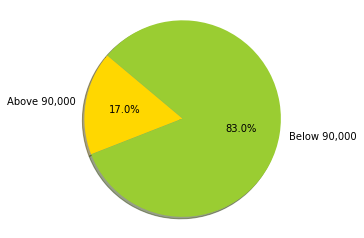

In [223]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Above 90,000', 'Below 90,000'
sizes = [len(data_sample[data_sample['PREVAILING_WAGE'] > 90000])/len(data_sample)*100, (1-len(data_sample[data_sample['PREVAILING_WAGE'] > 90000])/len(data_sample))*100]
colors = ['gold', 'yellowgreen']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

###  Comparison of career as Software Engineer Vs Data Related Jobs

In [140]:
data_job = data_sample[(data_sample['JOB_TITLE'].str.contains('.*DATA', na = False))]

In [141]:
data_job['PREVAILING_WAGE'].describe()

count    6.614700e+04
mean     1.174820e+05
std      2.421938e+06
min      1.508000e+04
25%      5.586900e+04
50%      6.585300e+04
75%      8.087000e+04
max      1.885437e+08
Name: PREVAILING_WAGE, dtype: float64

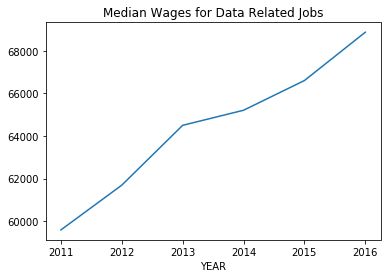

In [142]:
grps = data_job.groupby(by = 'YEAR')
data_job_year = grps['PREVAILING_WAGE'].describe()
data_job_year['50%'].plot.line(title = 'Median Wages for Data Related Jobs')

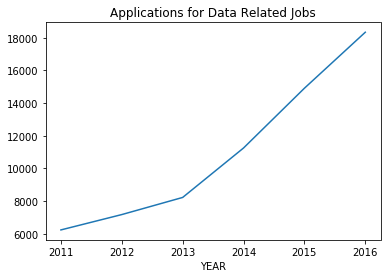

In [143]:
data_job_year['count'].plot.line(title = 'Applications for Data Related Jobs')

In [152]:
#set(data_sample[data_sample['JOB_TITLE'].str.match('SOFTWARE', na = False)]['JOB_TITLE'])

In [145]:
software_developer = data_sample[(data_sample['JOB_TITLE'].str.contains('SOFTWARE APPLICATION')) | (data_sample['JOB_TITLE'].str.contains('SOFTWARE DESIGN ENGINEER'))
         | (data_sample['JOB_TITLE'].str.contains('SOFTWARE DEVELOPER')) | (data_sample['JOB_TITLE'].str.contains('SOFTWARE DEVELOPMENT'))
         | (data_sample['JOB_TITLE'].str.contains('.*SOFTWARE ENGINEER')) | (data_sample['JOB_TITLE'].str.contains('.*SOFTWARE PROGRAMMER'))  
         | (data_sample['JOB_TITLE'].str.contains('.*SOFTWARE SYSTEMS'))]

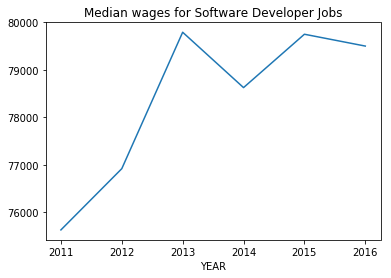

In [146]:
grps = software_developer.groupby(by = 'YEAR')
software_developer_year = grps['PREVAILING_WAGE'].describe()
software_developer_year['50%'].plot.line(title = 'Median wages for Software Developer Jobs')

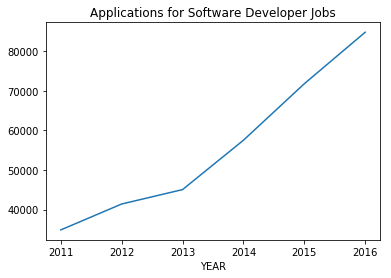

In [147]:
software_developer_year['count'].plot.line(title = 'Applications for Software Developer Jobs')